To get started its core dependencies must be installed


In [1]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 70.3MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=67d0da0956e907a70d47fbccc368983a84f8070ea9f2dc7372039d72901de0ac
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-y6r4cwim
  Running command git 

You probably need to restart RUN TIME. Then, 
Importing the libraries and needed files

In [0]:
# import some common libraries
import numpy as np
import cv2
import random
# Google colab thing !!
from google.colab.patches import cv2_imshow 

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

 get a picture for which we want to run our model

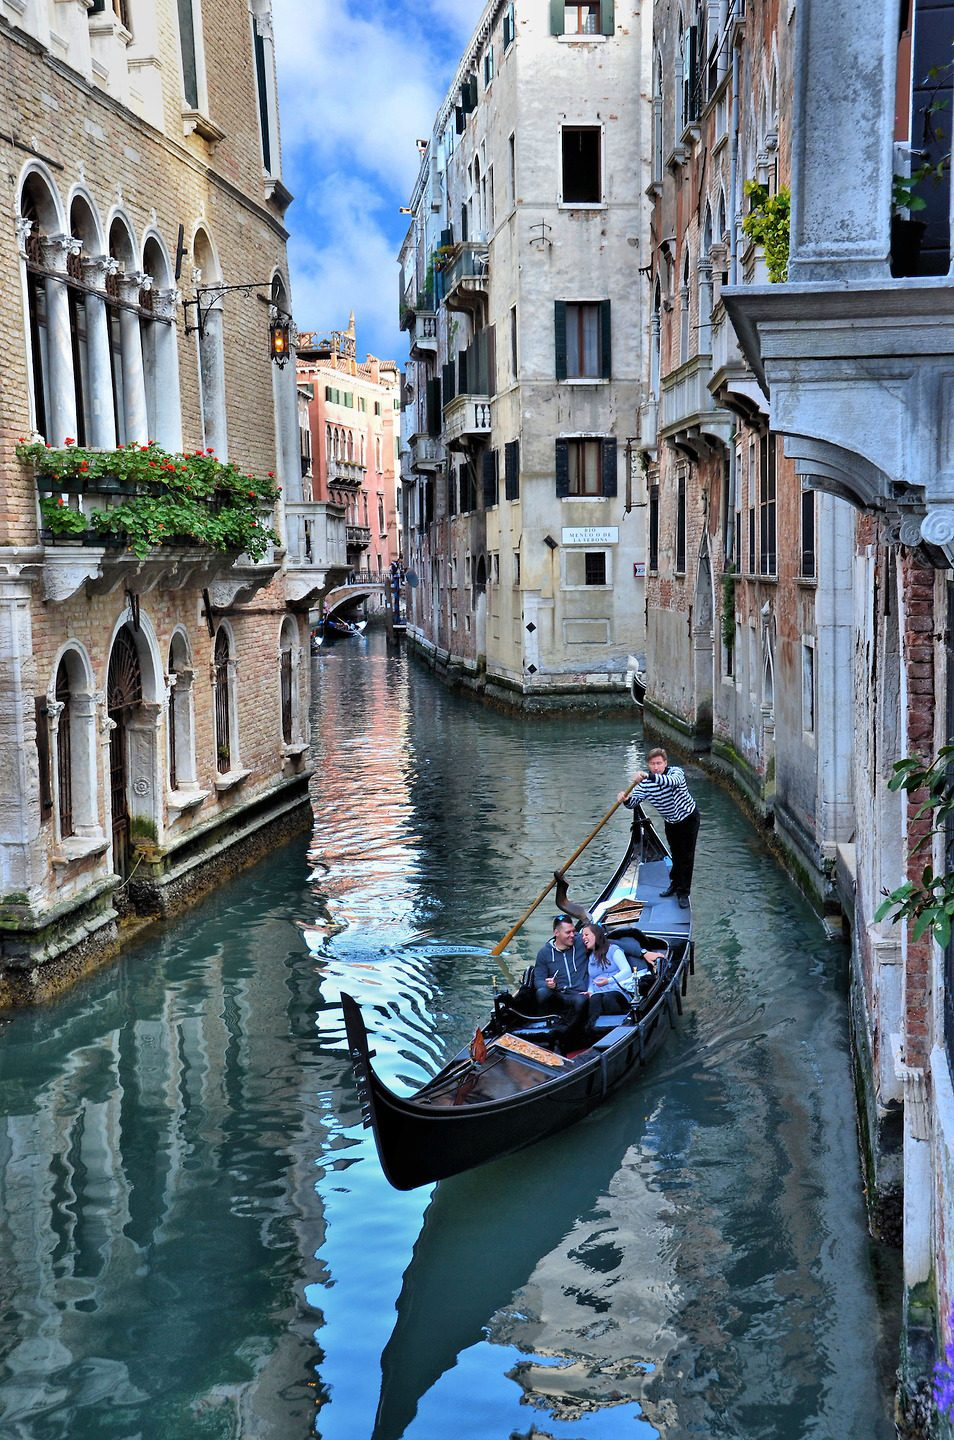

In [3]:
im = cv2.imread("/content/venise.jpg")
cv2_imshow(im)


Fitting the model 

In [4]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# set threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  


cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:06, 27.1MB/s]                           


In [6]:
print(outputs)

{'instances': Instances(num_instances=11, image_height=1440, image_width=954, fields=[pred_boxes = Boxes(tensor([[ 612.7415,  749.7661,  701.4174,  903.6520],
        [ 350.6280,  909.0334,  692.4442, 1164.1918],
        [ 529.5811,  915.2648,  590.8198, 1010.8719],
        [ 578.5219,  919.3272,  638.7224, 1012.9806],
        [ 271.3754,  325.9867,  287.8101,  362.8304],
        [ 888.6993,  162.0461,  938.3970,  278.6451],
        [  39.8193,  498.3736,   88.4794,  547.0152],
        [ 557.7012,  891.4589,  657.5412,  999.2681],
        [ 592.3799,  896.6190,  667.8796,  976.1297],
        [ 525.1685,  910.9301,  624.2563, 1030.1808],
        [  96.4065,  450.5614,  124.7798,  494.0103]], device='cuda:0')), scores = tensor([0.9898, 0.9667, 0.9490, 0.9198, 0.8508, 0.8034, 0.7604, 0.7395, 0.7331,
        0.5721, 0.5416], device='cuda:0'), pred_classes = tensor([ 0,  8,  0,  0,  9, 58, 58,  0,  0,  0, 58], device='cuda:0'), pred_masks = tensor([[[False, False, False,  ..., False, False,

Visualizing the PIC 

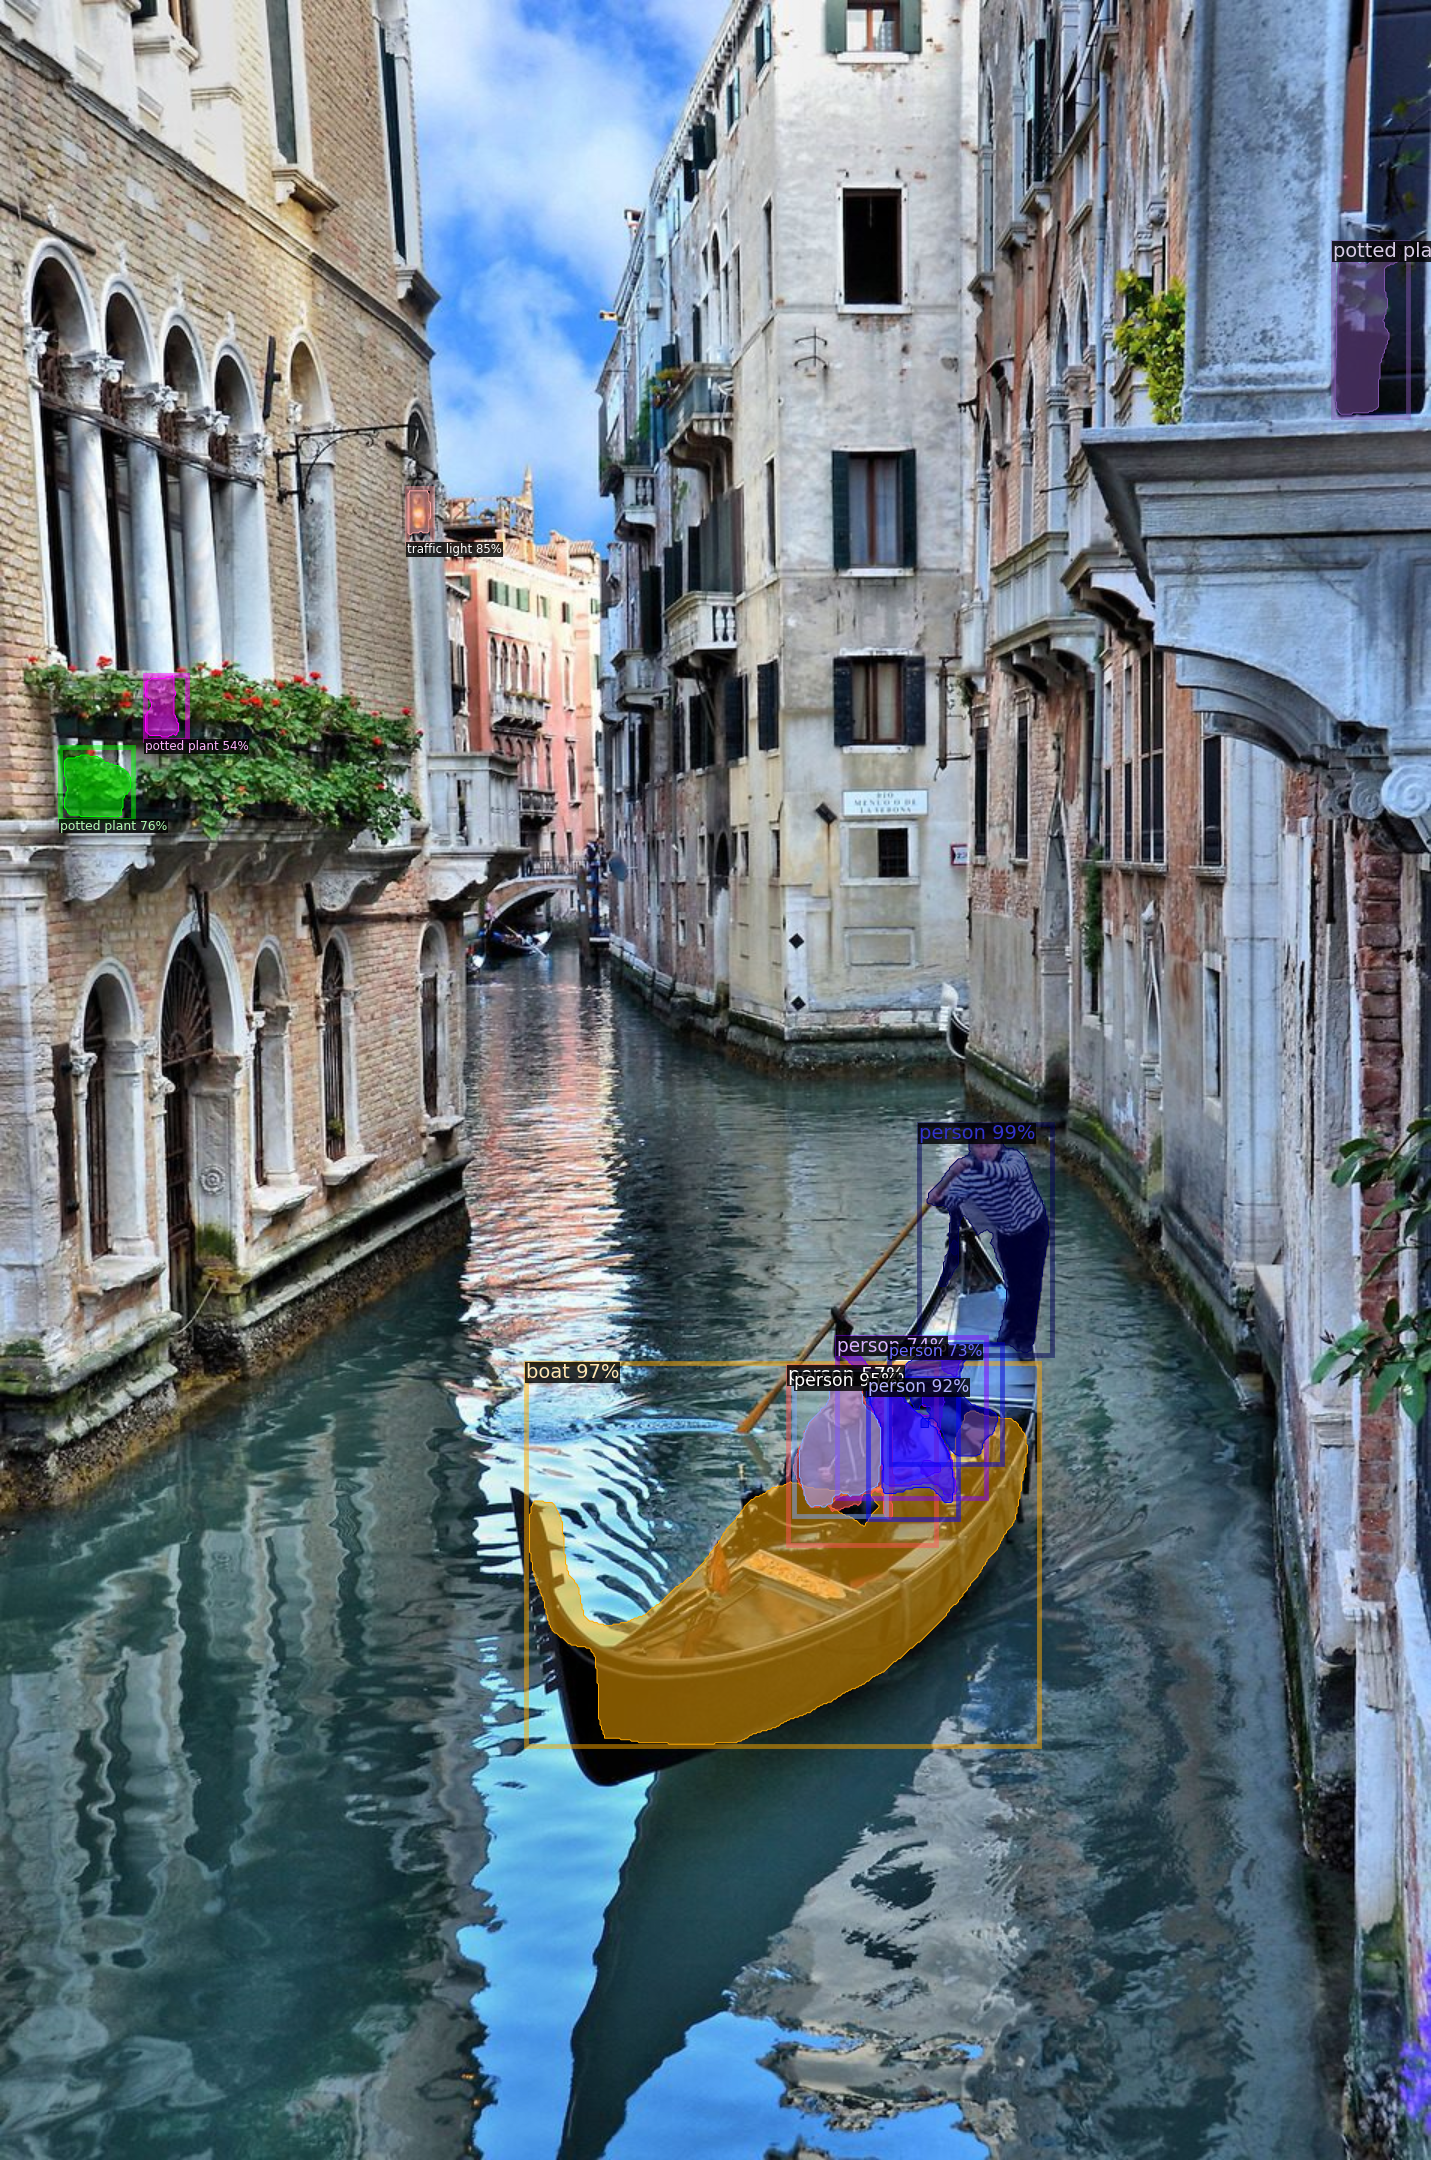

In [7]:
visuall = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.5)
visuall = visuall.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(visuall.get_image())